In [5]:
#@title Install libraries.
!pip install tensorflow keras keras-layer-normalization keras_cv keras_core --upgrade --quiet

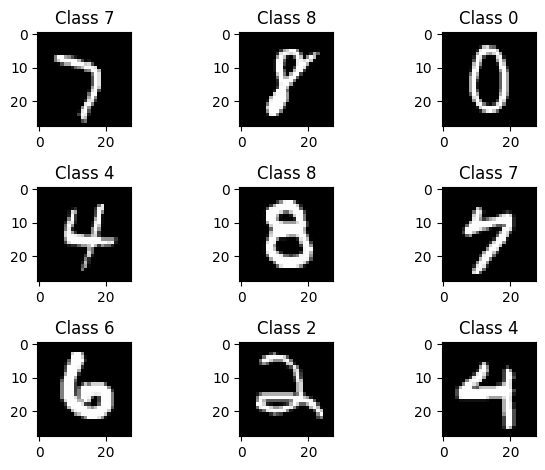

In [1]:
#@title MNIST handwritten digits classification - dataset.
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import utils
import matplotlib.pyplot as plt
import random

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1) # NHWC
X_test = X_test.reshape(10000, 28, 28, 1)

# Features: convert [0, 255] ints to normalized floats.
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Labels: one-hot encoding, 10 classes.
nb_classes = 10
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

#plt.rcParams['figure.figsize'] = (9,9)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

In [2]:
#@title MNIST handwritten digits classification - CNN model.
model = Sequential()                                 # Linear stacking of layers.

# TODO: Consider pre-processing layers.
# flip = keras.layers.RandomFlip("horizontal_and_vertical") # or "horizontal", "vertical"
# rotate = keras.layers.RandomRotation(0.2)
# crop = keras.layers.RandomCrop(28, 28)
# translation = keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)
# brightness = keras.layers.RandomBrightness([-0.8,0.8])
# contrast = keras.layers.RandomContrast(0.2)

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 3x3 filters, outputs 32 feature maps.
model.add(BatchNormalization(axis=-1))               # Normalize feature map before activation.
convLayer01 = Activation('relu')                     # Activation = ReLu.
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 3x3 filters, outputs 32 feature maps.
model.add(BatchNormalization(axis=-1))               # Normalize feature map before activation.
model.add(Activation('relu'))                        # Activation = ReLu.
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool max values over 2x2 kernel.
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 3x3 filters, outputs 64 feature maps.
model.add(BatchNormalization(axis=-1))               # Normalize feature map before activation.
convLayer03 = Activation('relu')                     # Activation = ReLu.
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 3x3 filters, outputs 64 feature maps.
model.add(BatchNormalization(axis=-1))               # Normalize feature map before activation.
model.add(Activation('relu'))                        # Activation = ReLu.
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool max values over 2x2 kernel.
model.add(convLayer04)
model.add(Flatten())                                 # Flatten 4x4x64 output to 1024-length vector.

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FC nodes.
model.add(BatchNormalization())                      # Normalize before activation.
model.add(Activation('relu'))                        # Activation = ReLu.

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of random nodes.
model.add(Dense(10))                                 # Final 10 output heads.
model.add(Activation('softmax'))                     # Activation = Softmax.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0

In [3]:
#@title MNIST handwritten digits classification - training.

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])
model.fit(X_train, Y_train)
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 11s 35ms/step - loss: 0.0449 - accuracy: 0.9866
Test score: 0.0448969341814518
Test accuracy: 0.9865999817848206


Shape of conv: (26, 26, 32)


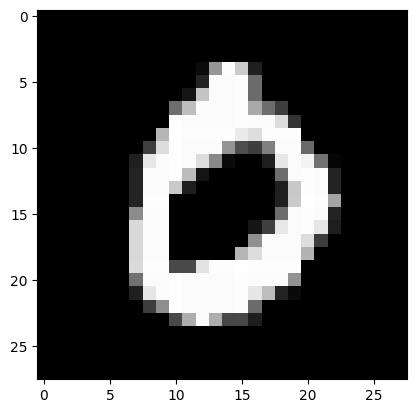

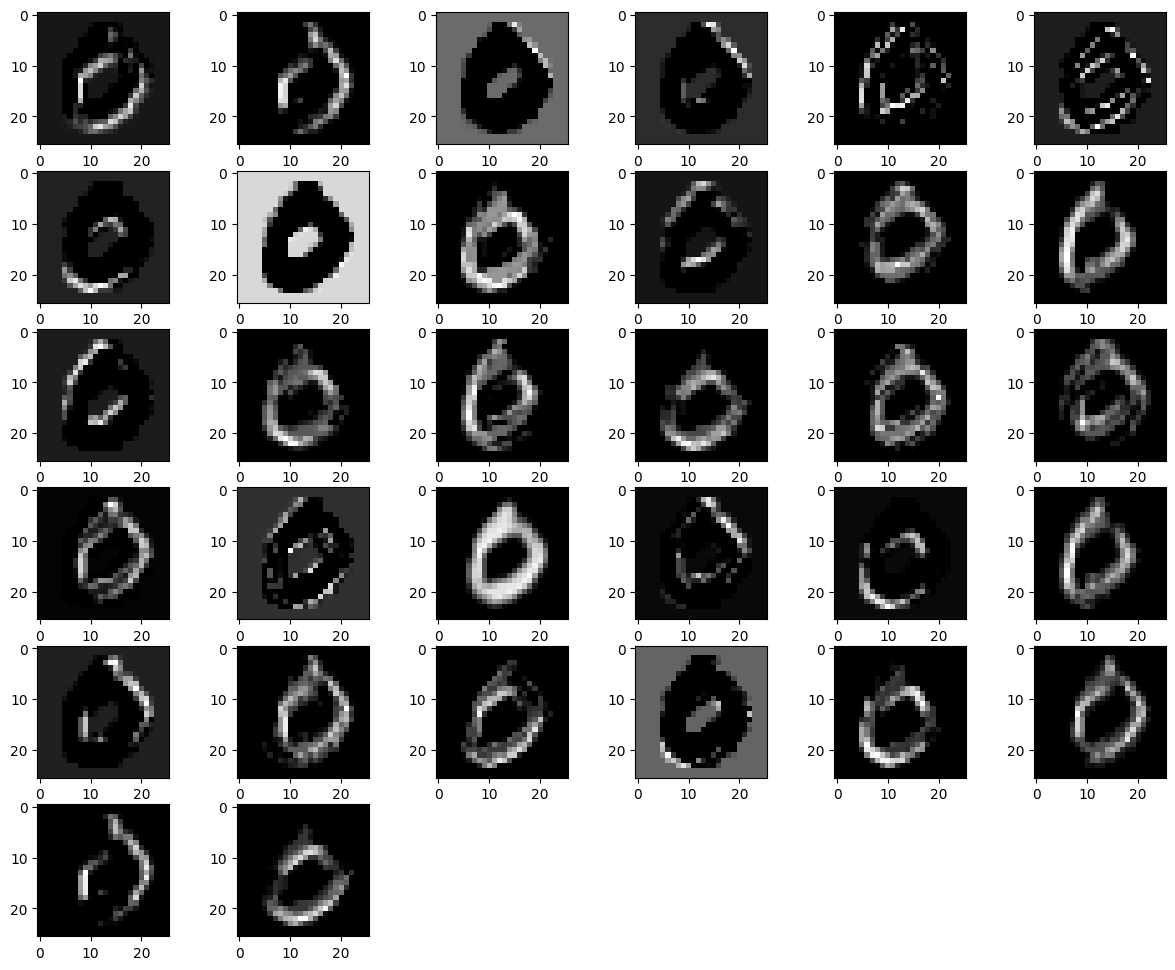

In [8]:
#@title Visualizing an example image and layer activations.
import numpy as np
from keras import backend as K

img = X_test[3] #@param
img = np.expand_dims(img, axis=0)
def visualize(layer):
    _convout1_f = K.function(model.inputs, [layer.output])

    def convout1_f(X):
        return _convout1_f([X])

    convolutions = convout1_f(img)
    convolutions = np.squeeze(convolutions)
    print ('Shape of conv:', convolutions.shape)
    m = convolutions.shape[2]
    n = int(np.ceil(np.sqrt(m)))

    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(15,12))
    for i in range(m):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[:,:,i], cmap='gray')

plt.figure()
plt.imshow(
    img.reshape(28,28),
    cmap='gray', interpolation='none')
visualize(convLayer01)

Shape of conv: (12, 12, 32)


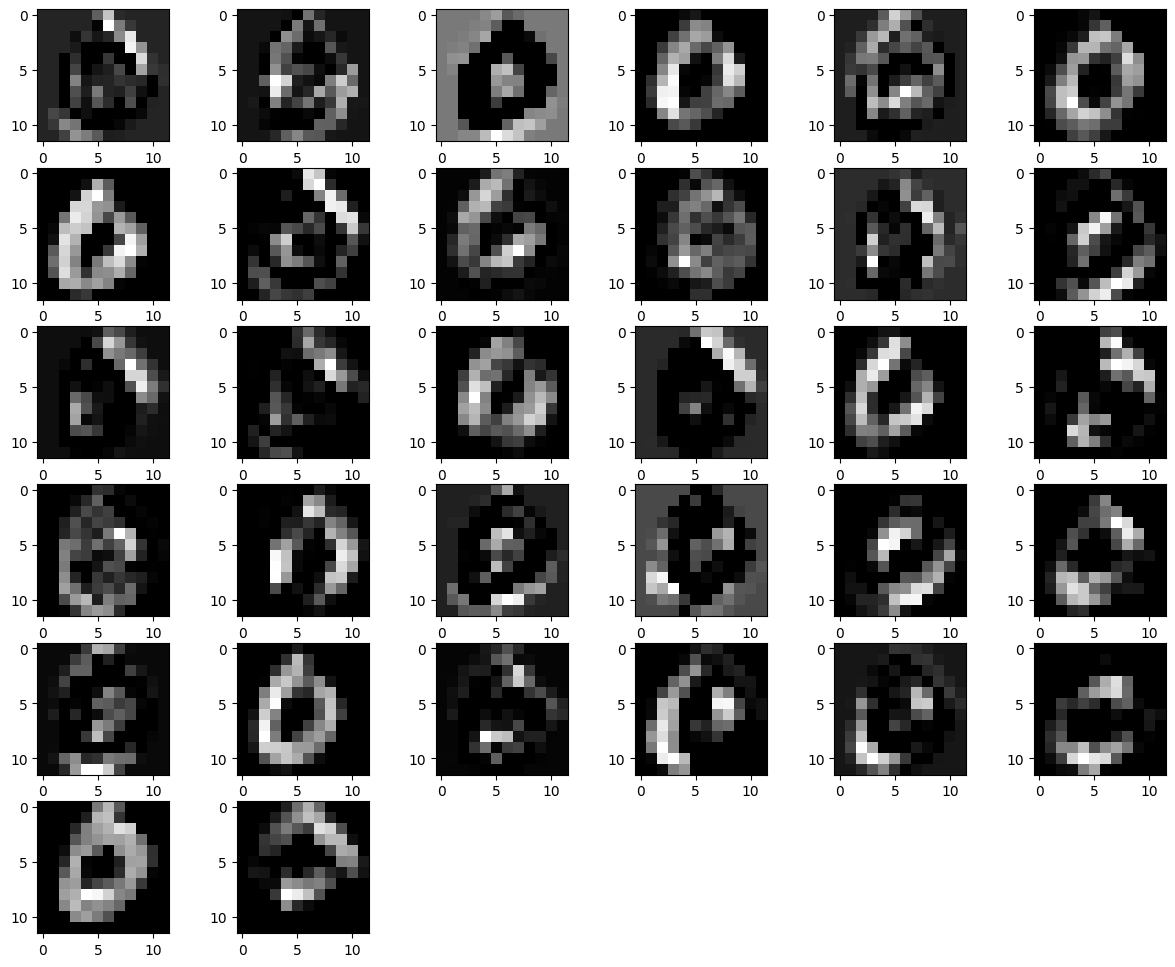

In [9]:
visualize(convLayer02)

Shape of conv: (10, 10, 64)


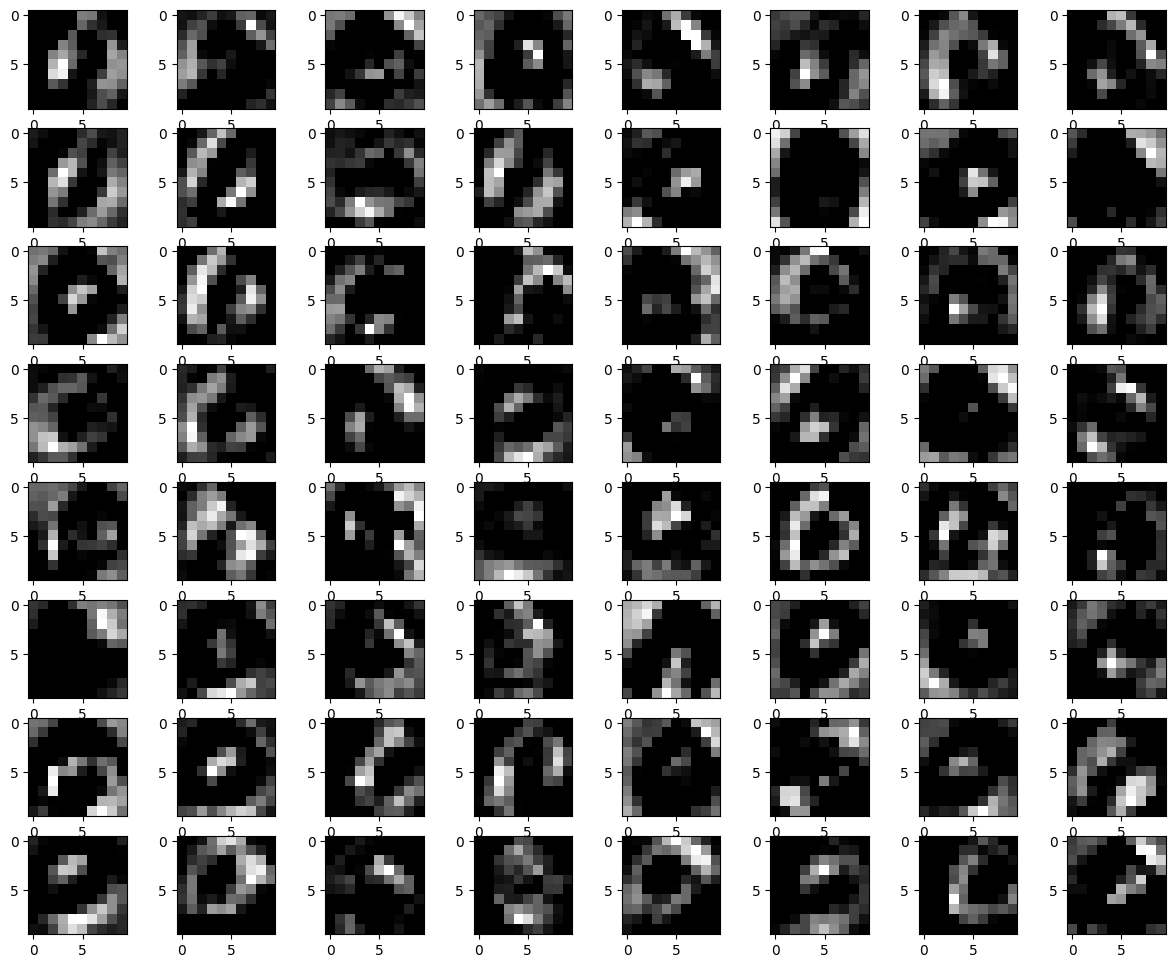

In [10]:
visualize(convLayer03)

Shape of conv: (4, 4, 64)


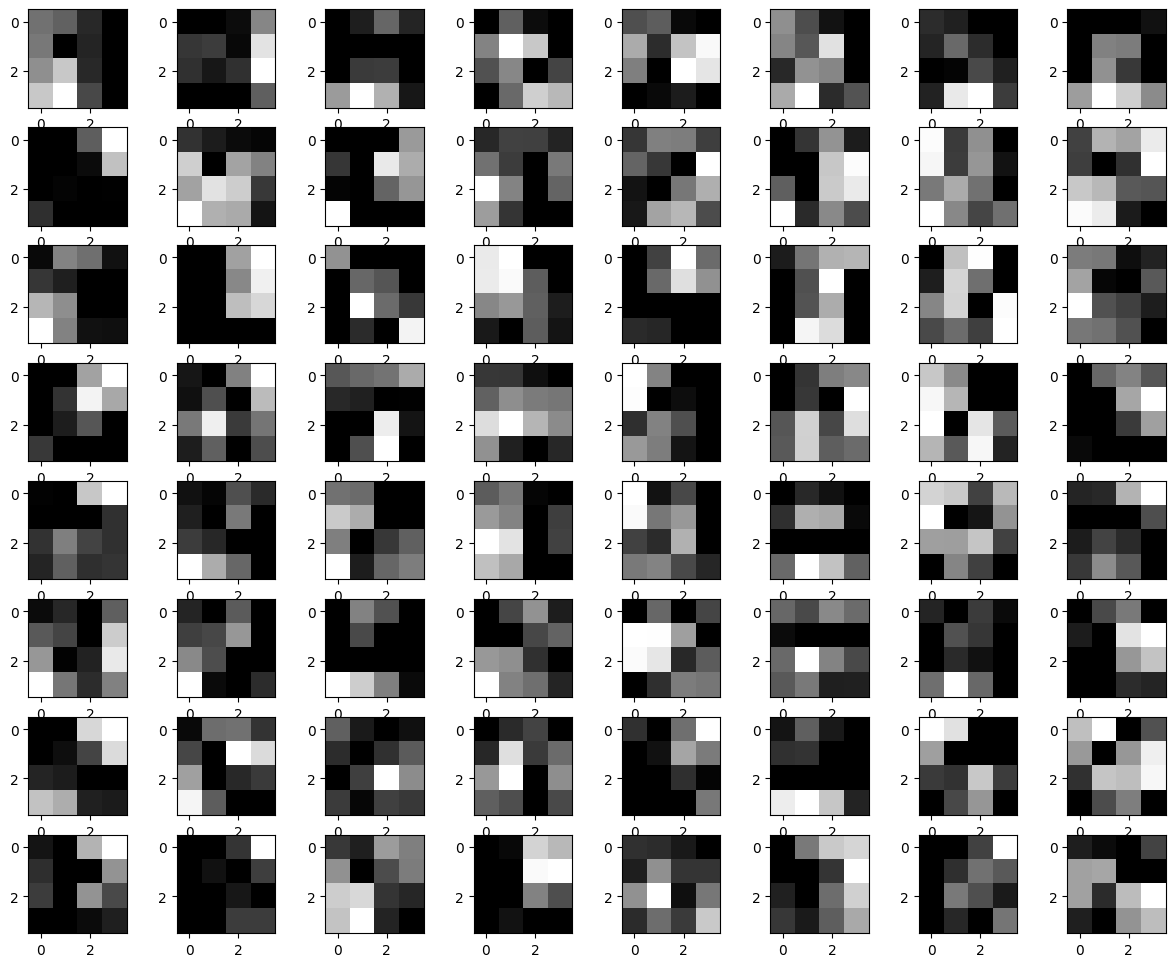

In [11]:
visualize(convLayer04)

In [1]:
#@title Generating images from text via stable diffusion - load the model.
import keras_cv
import os
import tensorflow as tf

from tensorflow import keras
import matplotlib.pyplot as plt

# Load compressed models from tensorflow_hub
# os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

def plot_images(images):
  """
  Plots a set of images.
  """
  plt.figure(figsize=(20, 20))
  for i in range(len(images)):
      ax = plt.subplot(1, len(images), i + 1)
      plt.imshow(images[i])
      plt.axis("off")

print("TensorFlow version: ", tf.__version__)
# The KerasCV implementation of Stable Diffusion is significantly faster
# than PyTorch. This may be largely attributed to XLA compilation.
# https://www.tensorflow.org/xla

# The world's most performant stable diffusion inference pipeline
# (as of September 2022). Run on GPU as follows:
# keras.mixed_precision.set_global_policy("mixed_float16")
# model = keras_cv.models.StableDiffusion(jit_compile=True)
# model.text_to_image("text", batch_size=3)

model = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

Using TensorFlow backend
TensorFlow version:  2.13.0
By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


50/50 [==============================] - 7373s 144s/step


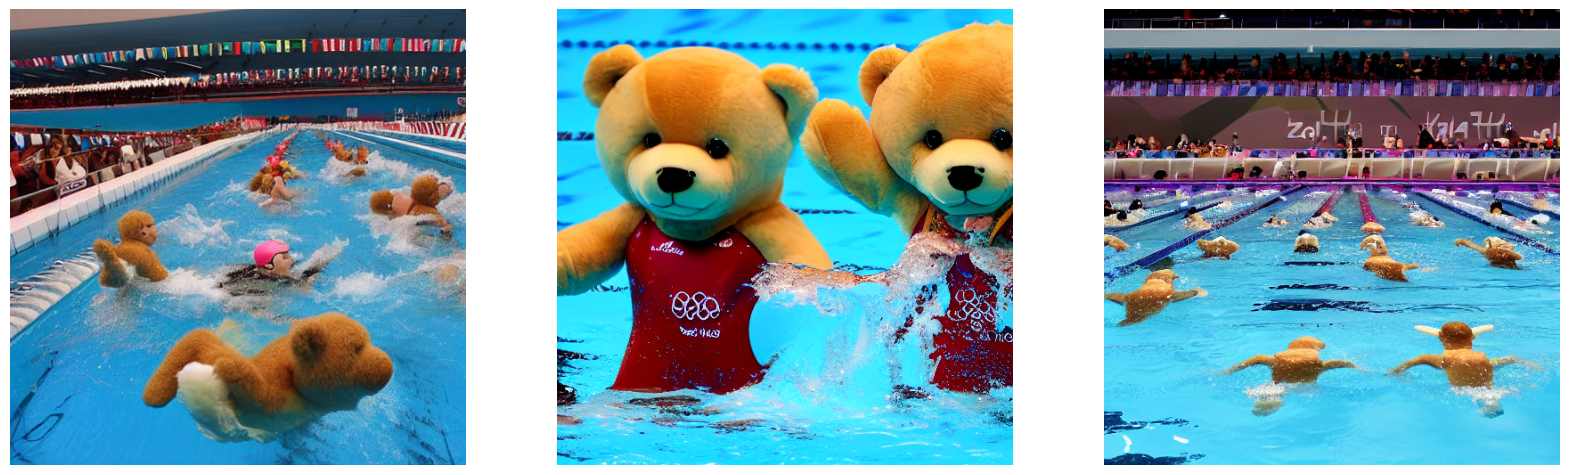

In [2]:
#@title Generating images from text via stable diffusion.

images = model.text_to_image(
    "Teddy bears swimming at the Olympics 400m Butterfly event.",
    batch_size=3,
)
plot_images(images)